In [2]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import pandas as pd
import matplotlib.pylab as plt
import math
%matplotlib inline

# Загружаем датасет

In [3]:
with open('C:\\Users\\denis\\Downloads\\hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('C:\\Users\\denis\\Downloads\\hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

In [17]:
result=train['data']
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
result=test_no_lables['data']
result

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
train['labels'][train['labels']==5]=-1
train['labels'][train['labels']==6]=+1
train['labels']

array([-1., -1.,  1., ...,  1., -1.,  1.])

In [18]:
mean = np.mean(result, axis=0)
std = np.std(result, axis=0)
with np.errstate(divide='ignore', invalid='ignore'): 
        result_norm = (result - mean) / (std)
result_norm[np.isnan(result_norm)] = 0 

In [19]:
# добавляем единичную колонку для w0
X = np.hstack([ np.ones((result.shape[0], 1)), result_norm] )
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Инициализируем веса случайны образом
np.random.seed(11)
w = np.random.normal(scale=0.001, size = X.shape[1])
w

array([ 1.74945474e-03, -2.86072997e-04, -4.84565132e-04, -2.65331856e-03,
       -8.28462937e-06, -3.19631364e-04, -5.36629362e-04,  3.15402668e-04,
        4.21050716e-04, -1.06560298e-03, -8.86239670e-04, -4.75733493e-04,
        6.89682310e-04,  5.61192176e-04, -1.30554851e-03, -1.11947526e-03,
        7.36837391e-04,  1.57463407e-03, -3.10750885e-05, -6.83446627e-04,
        1.09562970e-03, -3.09576637e-04,  7.25752225e-04,  1.54907163e-03,
        6.30079822e-04,  7.34932370e-05,  7.32271354e-04, -6.42575392e-04,
       -1.78093175e-04, -5.73954559e-04, -2.04375316e-04, -4.86495100e-04,
       -1.85775324e-04, -3.80536417e-04,  8.89776353e-05,  6.36716614e-05,
        2.96347108e-04,  1.40277112e-03, -1.54686257e-03,  1.29561858e-03,
       -2.37250446e-04, -1.23234621e-03, -1.72419767e-04,  9.18383749e-05,
        1.06755846e-03, -1.06163445e-03,  2.17348208e-04,  1.17819504e-04,
       -1.68411089e-03, -1.18575527e-03,  6.00102006e-04,  6.95567255e-04,
        1.08771086e-03,  

In [21]:
from sklearn.model_selection import train_test_split
y=train['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
def diffr(score):
    if score>1.:
        diff=1.-score
        score=1+diff
    return score

In [27]:
def countF(p):
    count=0
    for i in range(0,len(p)):
        if p[i]>=0.5:
            count+=1
    return count

In [102]:
#Для отрисовки графиков
import decimal
np.random.seed(11)
w = np.random.normal(scale=0.001, size = X.shape[1])
w
train_stat = []
test_stat = []
train_score = []
test_score=[]
for iter in range(100):
    loss_train = 0
    loss_test = 0
    score_train=0
    score_test=0
    for i in range(X_train.shape[0]):
        j = np.random.randint(0, X_train.shape[0])
        grad = - y_train[j] * X_train[j] / \
            ( 1 + math.exp( y_train[j] * np.dot(w.T, X_train[j]) ) ) + 0.001*w
        w =w - 0.0005* grad 
        loss_train+=np.log(1 + math.exp(-y_train[j] * np.dot(w.T, X_train[j]) ))
    for i in range(X_test.shape[0]):
        loss_test+=np.log(1 + math.exp(-y_test[i] * np.dot(w.T, X_test[i]) ))
    loss_train=loss_train/X_train.shape[0]
    loss_test=loss_test/X_test.shape[0]
    train_stat.append([iter, loss_train])
    test_stat.append([iter, loss_test])
    p_train = (1. / (1. + np.exp(-np.dot(w, X_train.T))))
    p_test = (1. / (1. + np.exp(-np.dot(w, X_test.T))))
    count=0
    for i in range(0,len(p_train)):
        if p_train[i]>=0.5:
            count+=1
    score_train=count/y_train[y_train==1].size
    count=0
    for i in range(0,len(p_test)):
        if p_test[i]>=0.5:
            count+=1
    score_test=count/y_test[y_test==1].size
    if score_train>1.:
        diff=1.-score_train
        score_train=1+diff
    if score_test>1.:
        diff=1.-score_test
        score_test=1+diff
    train_score.append([iter, score_train])
    test_score.append([iter, score_test])
    
    
#plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
#print(w, grad)
#draw_model(w)

In [10]:
#финальные результаты
y=train['labels']
for iter in range(100):
    for i in range(X.shape[0]):
        j = np.random.randint(0, X.shape[0])
        grad = - y[j] * X[j] / \
            ( 1 + math.exp( y[j] * np.dot(w.T, X[j]) ) ) + 0.001 * w
        w = w - 0.0005 * grad
p = (1. / (1. + np.exp(-np.dot(w, X.T))))

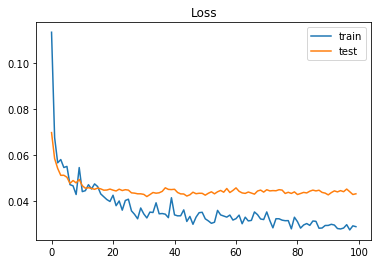

In [116]:
trs = np.array(train_stat)
tes = np.array(test_stat)
plt.title('Loss')
plt.plot(trs[:, 0], trs[:, 1], label='train')
plt.plot(tes[:, 0], tes[:, 1], label='test')
plt.legend()

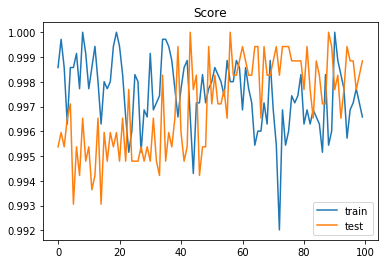

In [103]:
trs = np.array(train_score)
tes = np.array(test_score)
plt.title('Score')
plt.plot(trs[:, 0], trs[:, 1], label='train')
plt.plot(tes[:, 0], tes[:, 1], label='test')
plt.legend()

In [16]:

# compute Y_pred
Y_pred=p
with open('C:\\Users\\denis\\Downloads\\solutionF.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(p)):
        print(i, Y_pred[i], sep=',', file=fout)